In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import itertools

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# classification models
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# custom modules
import modeling as md
import prepare
import acquire
import exploration
import split

# global variable, will never change
alpha = 0.05

# I wrote several functions in exploration.py and modeling.py to help 
# with formatting of certain results, and grouping important things
# like classification reports, confusion matrices,

# Decision Tree Exercises

In [2]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
target_var = 'survived'
train, validate, test = split.train_validate_test_split(titanic_df, target_var)

md.impute_value(train, validate, test, col_names=['age'])


train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]
train

['age', 'fare']
Categories related to survived:
pclass
sibsp
parch
alone
embarked_S
sex_male


KeyError: "['customer_id'] not in index"

## Q1: What is your baseline prediction? What is your baseline accuracy?

In [ ]:
baseline = 1 - train.survived.mean()
baseline

## Q2: Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
results, reports = md.decision_tree(train, validate, test, target_var, depth=3)
dec_tree_df = md.Results(results, reports, target_var)
dec_tree_df.summary.drop(columns='validate_accuracy')

## Q3: Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
print(f'Accuracy: {dec_tree_df.summary.train_accuracy}')
print(dec_tree_df.train_report(0))
print(dec_tree_df.train_confusion_matrix())

## Q4 Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
dec_tree_df.train_report(0)

## Run through steps 2-4 using a different max_depth value.



In [ ]:
results, reports = md.decision_tree(train, validate, test, target_var, depth = 5, loop=True)
dec_tree_df = md.Results(results, reports, target_var)
dec_tree_df.summary

In [ ]:
print(f'Accuracy: {dec_tree_df.summary[["depth", "train_accuracy"]]}')
print(dec_tree_df.train_report(0))
print(dec_tree_df.train_confusion_matrix())

 ## Which model performs better on your in-sample data?



A decision tree with more levels does better on in-sample data. This is probably due to overfitting.

## Which model performs best on your out-of-sample data, the validate set?

Models with depth 3 and 4 seem to do well without over-fitting to the training data.

# Random Forests Exercises

In [ ]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
target_var = 'survived'
train, validate, test = split.train_validate_test_split(titanic_df, target_var)

md.impute_value(train, validate, test, col_names=['age'])


train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]

In [ ]:
train

In [ ]:
validate

## Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [ ]:
results, reports = md.random_forests(train, validate, test, target_var, min_sample_leaf=1,depth= 10, inverse=False)
rf_df = md.Results(results, reports, target_var)
depth_ten = rf_df.summary.depth==10
summary = rf_df.summary[depth_ten]
summary


## Evaluate your results using the model score, confusion matrix, and classification report.




In [ ]:
print(f'Train Accuracy: {summary.train_accuracy}')
print(f'Validate Accuracy: {summary.validate_accuracy}')
print(rf_df.report(9))
rf_df.train_confusion_matrix(9)

## Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
rf_df.report(9)

## Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [ ]:
results, reports = md.random_forests(train, validate, test, target_var, depth=10, inverse=True)
rf_df = md.Results(results, reports, target_var)
rf_df.df

## What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Depth of 10 and min_sample_leaf of 1 performs better on in-sample data
due to overfitting.

## After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Best performance: I'd pick depth 2, min_sample_leaf 9. Even though the metrics aren't as close together as depth 1 min_sample_leaf 10, it is 
several percent higher in training and validate accuracy, while still
maintaining a relative closeness in metrics.

# K Nearest Neighbors Exercises

In [ ]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
target_var = 'survived'
train, validate, test = split.train_validate_test_split(titanic_df, target_var)

md.impute_value(train, validate, test, col_names=['age'])


train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]
train

## Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
n_neighbor = [5]
results, reports = md.knearest_neightbors(train, validate, test, target_var, 
                                  n_neighbors=n_neighbor)

knn_df = md.Results(results, reports, target_var)
knn_df.set_baseline((train.survived==0).mean())
knn_df.summary

## Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
print(f'Training accuracy:\n {knn_df.summary.train_accuracy}')
print(f'Validate accuracy:\n {knn_df.summary.validate_accuracy}')

print(knn_df.report())
print(knn_df.train_confusion_matrix())
print(knn_df.validate_confusion_matrix())
knn_df.summary

## Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
knn_df.report()

## Run through steps 2-4 setting k to 10



In [ ]:
n_neighbor = [5, 10, 20]
results, reports = md.knearest_neightbors(train, validate, test,
                                                target_var,
                                               n_neighbors=n_neighbor)
knn_df = md.Results(results, reports, target_var)
knn_df.summary

#### Dropping knn_distance models due to substantial overfitting.

In [ ]:
summary = knn_df.summary[knn_df.summary.model_type == 'knn_uniform']
summary

In [ ]:
# need to fix function to accept 0 without printing all
# also would like to pass list for specific indexes
knn_df.report(0)

## What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



#### Knn with weight as distance has nearly 100% accuracy due to massive overfitting.

## Which model performs best on our out-of-sample data from validate?



knn_uniform with n == 20 has the best validate performance, its validate acuually performed slightly better than training.

# Logistic Regression

In [ ]:
train

In [ ]:
validate

## Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [ ]:
# age_fare_plcass -> afp
afp = ['age', 'fare', 'pclass', target_var]
afp_train = train[afp]
afp_validate = validate[afp]
afp_test = test[afp]

afp_train

In [ ]:
afp_validate

In [ ]:
results, reports = md.logistic_regression(afp_train, afp_validate,
                                         afp_test, target_var, c=2,
                                         solver='lbfgs')
afp_logit = md.Results(results, reports, target_var)
afp_logit.summary

### Answer

Yes, a model only including age, fare and plcass performs better than baseline.

## Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [ ]:
#age, fare, plcass, sex -> afps
afps = ['age', 'fare', 'pclass', 'sex_male', target_var]

afps_train = train[afps]
afps_validate = validate[afps]
afps_test = test[afps]

afps_train

In [ ]:
results, reports = md.logistic_regression(afps_train, afps_validate,
                                               afps_test, target_var, 
                                               c=2, solver='lbfgs')
afps_logit = md.Results(results, reports, target_var)
afps_logit.summary

## Try out other combinations of features and models.

In [ ]:
# age, fare, pclass, sex, alone -> afpsa
afpsa = ['age', 'fare', 'pclass', 'sex_male', 'alone', target_var]
afpsa_train = train[afpsa]
afpsa_validate = validate[afpsa]
afpsa_test = test[afpsa]

afpsa_train

In [ ]:
results, reports = md.logistic_regression(afpsa_train, afpsa_validate,
                                               afpsa_test, target_var, c=2)

afpsa_logit = md.Results(results, reports, target_var)
afpsa_logit.summary

## Takeaway

 ### Adding 'alone' increased training accuracy but didn't seem to affect validate accuracy.

In [ ]:
# taking out 'alone', adding 'embarked_S'
sub = ['age', 'fare', 'pclass', 'sex_male', 'embarked_S', target_var]

results, reports = md.logistic_regression(train[sub], validate[sub],
                                         test[sub], target_var, c=2)
afpse_logit = md.Results(results, reports, target_var)
afpse_logit.summary

In [ ]:
# adding 'parch'
afpsep = ['age', 'fare', 'pclass', 'sex', 'embarked_S', 'parch']


# Modeling Telco

In [25]:
telco_df, categories, quant_cols, unencoded_df = prepare.acquire_prep_telco()
target_var = 'churn'

telco_df['customer_id'] = unencoded_df['customer_id']
# removing outliers from training to see if it improves model accuracy
train, validate, test = split.train_validate_test_split(telco_df, target_var)
#train = prepare.remove_outliers(2.5, quant_cols, train)
baseline = (train.churn==0).mean()

train = exploration.dataset_reduction(train, target_var, categories, quant_cols)
validate = validate[train.columns]




multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
Categories related to churn:
senior_citizen
partner
dependents
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
internet_service_type_Fiber optic
internet_service_type_None
payment_type_Credit card (automatic)
payment_type_Electronic check
payment_type_Mailed check
contract_type_One year
contract_type_Two year


In [15]:
md.Results.baseline = baseline
baseline

0.7343154686309372

# Telco Decision Tree Modeling

In [17]:
md.Results.all_instances = []
results, reports = md.decision_tree(train, validate, test, target_var, loop=True, depth=10)
dec_tree_df = md.Results(results, reports, target_var)
dec_tree_df.summary


,model_type,depth,train_accuracy,validate_accuracy,difference,percent_diff
0,decision_tree,1,0.734315,0.734005,0.000311,0.04
1,decision_tree,2,0.794006,0.776066,0.017939,2.26
2,decision_tree,3,0.794006,0.776066,0.017939,2.26
3,decision_tree,4,0.800610,0.777844,0.022766,2.84
4,decision_tree,5,0.806960,0.776066,0.030893,3.83
5,decision_tree,6,0.816612,0.777251,0.039360,4.82
6,decision_tree,7,0.832106,0.763626,0.068480,8.23
7,decision_tree,8,0.841504,0.763033,0.078471,9.33
8,decision_tree,9,0.857506,0.758294,0.099212,11.57
9,decision_tree,10,0.876302,0.751185,0.125117,14.28


# Telco Random Forests Modeling

In [18]:
results, reports = md.random_forests(train, validate, test, target_var, min_sample_leaf=1, depth=20, inverse=True )
rf_df = md.Results(results, reports, target_var)
rf_df.summary

,model_type,depth,min_samples_leaf,train_accuracy,validate_accuracy,difference,percent_diff
0,random_forests,1,20,0.734315,0.734005,0.000311,0.04
1,random_forests,2,19,0.768352,0.752370,0.015982,2.08
2,random_forests,3,18,0.790958,0.768365,0.022593,2.86
3,random_forests,4,17,0.799848,0.782583,0.017265,2.16
4,random_forests,5,16,0.805436,0.786730,0.018706,2.32
5,random_forests,6,15,0.811786,0.781991,0.029795,3.67
6,random_forests,7,14,0.814834,0.789692,0.025142,3.09
7,random_forests,8,13,0.821184,0.792654,0.028530,3.47
8,random_forests,9,12,0.824232,0.789692,0.034540,4.19
9,random_forests,10,11,0.826772,0.792654,0.034118,4.13


# Telco K-Nearest Neighbors Modeling

In [19]:
neighbors = list(range(1,11))


results, reports = md.knearest_neightbors(train, validate, test, target_var, n_neighbors =neighbors)
knn_sub5_df = md.Results(results, reports, target_var)
knn_sub5_df.summary



,model_type,n_nearest_neighbor,train_accuracy,validate_accuracy,difference,percent_diff
0,knn_uniform,1,0.997206,0.704384,0.292822,29.36
1,knn_uniform,2,0.860808,0.747630,0.113177,13.15
2,knn_uniform,3,0.858522,0.742299,0.116223,13.54
3,knn_uniform,4,0.833122,0.766588,0.066534,7.99
4,knn_uniform,5,0.831852,0.757109,0.074743,8.99
5,knn_uniform,6,0.818390,0.773104,0.045285,5.53
6,knn_uniform,7,0.818898,0.776659,0.042239,5.16
7,knn_uniform,8,0.812802,0.784360,0.028441,3.50
8,knn_uniform,9,0.815088,0.777251,0.037836,4.64
9,knn_uniform,10,0.808738,0.770735,0.038003,4.70


# Telco Logistic Regression Modeling

### No Scaling of Data

In [20]:
results, reports = md.logistic_regression(train, validate, test, 
                                          target_var, c=3,
                                          solver='liblinear')
logi_1 = md.Results(results, reports, target_var)
logi_1.summary

,model_type,C,train_accuracy,validate_accuracy,difference,percent_diff
0,logistic_regression,0.1,0.800356,0.793246,0.007109,0.89
1,logistic_regression,0.2,0.799594,0.795024,0.004570,0.57
2,logistic_regression,0.3,0.798070,0.795616,0.002453,0.31
3,logistic_regression,0.4,0.798578,0.795616,0.002961,0.37
4,logistic_regression,0.5,0.802134,0.795024,0.007110,0.89
5,logistic_regression,0.6,0.802642,0.795024,0.007618,0.95
6,logistic_regression,0.7,0.804166,0.793839,0.010327,1.28
7,logistic_regression,0.8,0.804420,0.794431,0.009988,1.24
8,logistic_regression,0.9,0.803658,0.794431,0.009226,1.15
9,logistic_regression,1.0,0.803404,0.794431,0.008972,1.12


In [22]:
sub2 = ['monthly_charges', 'internet_service_type_Fiber optic',
       'payment_type_Electronic check',
       'payment_type_Mailed check',
       'internet_service_type_None',
       target_var]
results, reports = md.logistic_regression(train[sub2], validate[sub2],
                                          test[sub2], target_var, c=3)
main_drivers = md.Results(results, reports, target_var)
main_drivers.summary


KeyError: "['customer_id'] not found in axis"

In [ ]:
sub3 = ['monthly_charges', 'internet_service_type_Fiber optic',
       'payment_type_Electronic check',
       'payment_type_Mailed check',
       'internet_service_type_None',
       'payment_type_Credit card (automatic)',
       target_var]
results, reports = md.logistic_regression(train[sub3], validate[sub3],
                                          test[sub3], target_var, c=3,
                                         solver='liblinear')
main_drivers = md.Results(results, reports, target_var)
main_drivers.summary

In [ ]:
sub4 = ['monthly_charges', 'internet_service_type_Fiber optic',
       'payment_type_Electronic check',
       'payment_type_Mailed check',
       'internet_service_type_None',
       'payment_type_Credit card (automatic)',
       'senior_citizen',
       target_var]
results, reports = md.logistic_regression(train[sub4], validate[sub4],
                                          test[sub4], target_var, c=3)
main_drivers = md.Results(results, reports, target_var)
main_drivers.summary

In [ ]:
sub5 = ['monthly_charges', 'internet_service_type_Fiber optic',
       'payment_type_Electronic check',
       'internet_service_type_None',
       'payment_type_Credit card (automatic)',
       'senior_citizen',
       'partner',
       target_var]
results, reports = md.logistic_regression(train[sub5], validate[sub5],
                                          test[sub5], target_var, c=3,
                                         solver='liblinear')
main_drivers = md.Results(results, reports, target_var)
main_drivers.summary

In [ ]:
md.Results.baseline

### With Scaling of Data

In [23]:
col_to_scale = ['monthly_charges', 'total_charges', 'monthly_tenure_ratio'] #'total_monthly_product', 'total_tenure_squared']
scaled_df = telco_df[col_to_scale].apply(lambda x: ((x-x.min())/(x.max()-x.min())))

telco_encoded = telco_df.drop(columns=col_to_scale)
telco_scaled_df = pd.concat([scaled_df, telco_encoded], axis=1)
    
telco_scaled_df
train, validate, test = split.train_validate_test_split(telco_scaled_df, target_var)

train.head()

,monthly_charges,total_charges,monthly_tenure_ratio,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,paperless_billing,churn,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year,customer_id
5919,0.525871,0.493930,0.009374,1,0,0,0,58.0,1,1.0,...,1,0,0,0,1,0,0,1,0,8331-ZXFOE
1915,0.668657,0.693532,0.009155,0,0,0,1,71.0,1,1.0,...,1,0,1,0,1,0,0,1,0,2790-XUYMV
5054,0.074627,0.099671,0.004577,1,0,1,1,35.0,1,1.0,...,1,0,0,1,0,1,0,0,0,7107-UBYKY
2355,0.009453,0.000046,0.185277,0,0,1,1,1.0,1,0.0,...,0,0,0,1,0,0,1,0,0,3373-YZZYM
6279,0.355721,0.119675,0.023800,0,1,0,0,20.0,1,0.0,...,0,0,0,0,0,0,1,1,0,8883-GRDWQ


<AxesSubplot:>

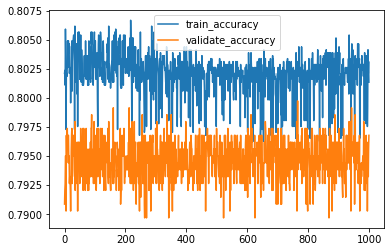

In [33]:
#results, reports = md.logistic_regression(train, validate, test, 
                                       #   target_var, c=100, solver='liblinear')
#logi_1 = md.Results(results, reports, target_var)
#logi_1.summary
logi_1.summary[['train_accuracy', 'validate_accuracy']].plot()

In [34]:
summary = md.Results.total_summary
summary

,model_type,depth,train_accuracy,validate_accuracy,difference,percent_diff,min_samples_leaf,n_nearest_neighbor,C
0,decision_tree,1.0,0.734315,0.734005,0.000311,0.04,NaN,NaN,NaN
1,decision_tree,2.0,0.794006,0.776066,0.017939,2.26,NaN,NaN,NaN
2,decision_tree,3.0,0.794006,0.776066,0.017939,2.26,NaN,NaN,NaN
3,decision_tree,4.0,0.800610,0.777844,0.022766,2.84,NaN,NaN,NaN
4,decision_tree,5.0,0.806960,0.776066,0.030893,3.83,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,logistic_regression,NaN,0.799340,0.793839,0.005501,0.69,NaN,NaN,99.6
996,logistic_regression,NaN,0.804166,0.795616,0.008549,1.06,NaN,NaN,99.7
997,logistic_regression,NaN,0.802134,0.793246,0.008887,1.11,NaN,NaN,99.8
998,logistic_regression,NaN,0.803150,0.795616,0.007533,0.94,NaN,NaN,99.9


In [ ]:
summary.validate_accuracy.max()

In [ ]:
un_train, un_validate, un_test= split.train_validate_test_split(acquire.get_telco_data(), 'churn')

In [ ]:
un_train

In [ ]:
test